---

# University of Liverpool

## COMP534 - Applied AI

---

This notebook is associated with Assignment 1. Use it to complete the assignment by following the instructions provided in each section, which includes a text cell describing the requirements. For additional details, see the Canvas.

Use this first cell to import the necessary libraries.

In [36]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, r2_score, ConfusionMatrixDisplay,f1_score,accuracy_score, precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline

# 1. **Data Management**


In this part, you need to:

1.   analyse and prepare the data. Use plots, graphs, and tables (such as histogram, box plots, scatterplots etc.) to better analyse the dataset and identify issues or potential improvements in the data, including (but not limited to) unnecessary feature/variable which can be dropped/removed, standardization, encoding, etc;
2.   split the data and define your experimental protocol (such as cross-validation or k-fold).

In [37]:
# Write your proposed solution code here. Create more code cells if you find it necessary

orignal_data= pd.read_csv('assign1-grades.csv') #Loading the csv
orignal_data.info() # To check the datatypes of each column
orignal_data.describe() # Quick insight of our dataset




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000


In [38]:
orignal_data.isnull().sum() # to check if there is any NULL values in our dataset

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


## 1. checking each feature by visualiation
1. Histogram

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>],
       [<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>],
       [<Axes: title={'center': 'goout'}>,
        <Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'Grade'}>, <Axes: >, <Axes: >]],
      dtype=object)

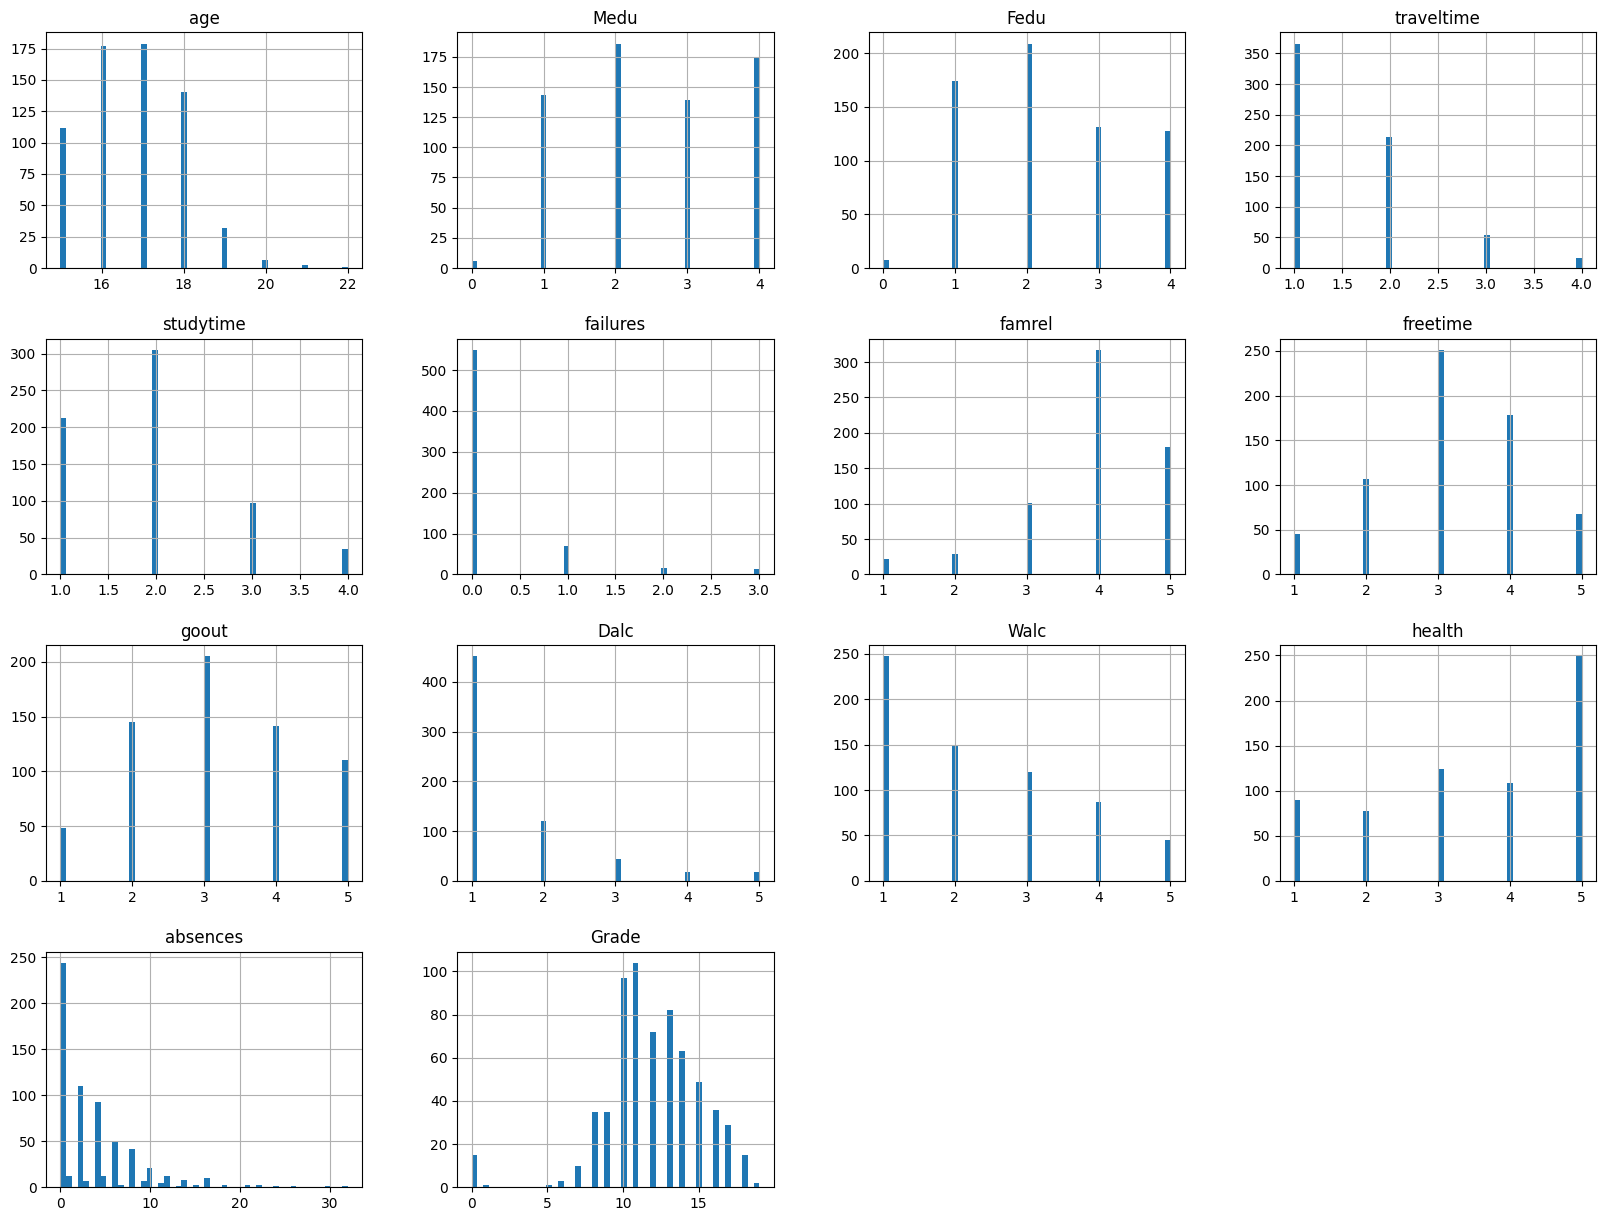

In [39]:
%matplotlib inline
orignal_data.hist(bins=50,figsize=(20,15))

## 2. converting catagorical columns into numerical values


In [40]:
orignal_data = orignal_data.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' else col)

## 3. Looking for corelations

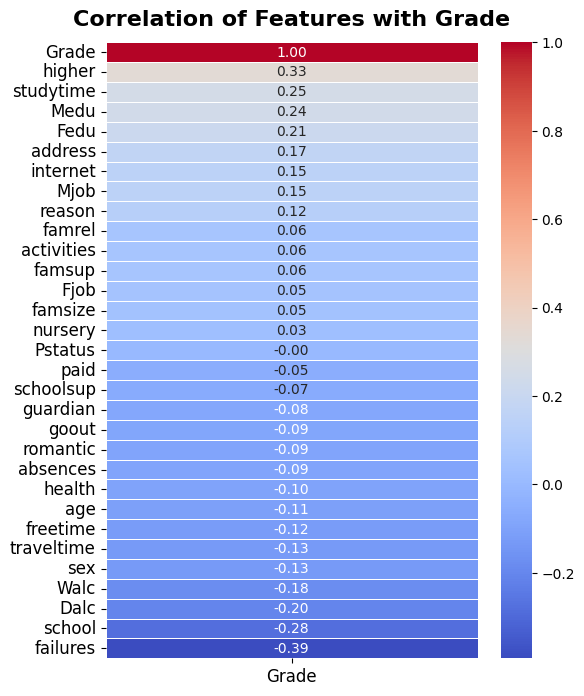

In [41]:
plt.figure(figsize=(6, 8))

# Select the "Grade" column for correlation:
grade_corr = orignal_data.corr()[["Grade"]].sort_values(by="Grade", ascending=False)

# heatmap creation:
sns.heatmap(grade_corr,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidths=0.5,
            cbar=True,
            annot_kws={"size": 10})

plt.title("Correlation of Features with Grade", fontsize=16, fontweight='bold', pad=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()



## 4. Visual representation of above corelation w.r.t Grade
1. Line graph
2. Heat map matrix

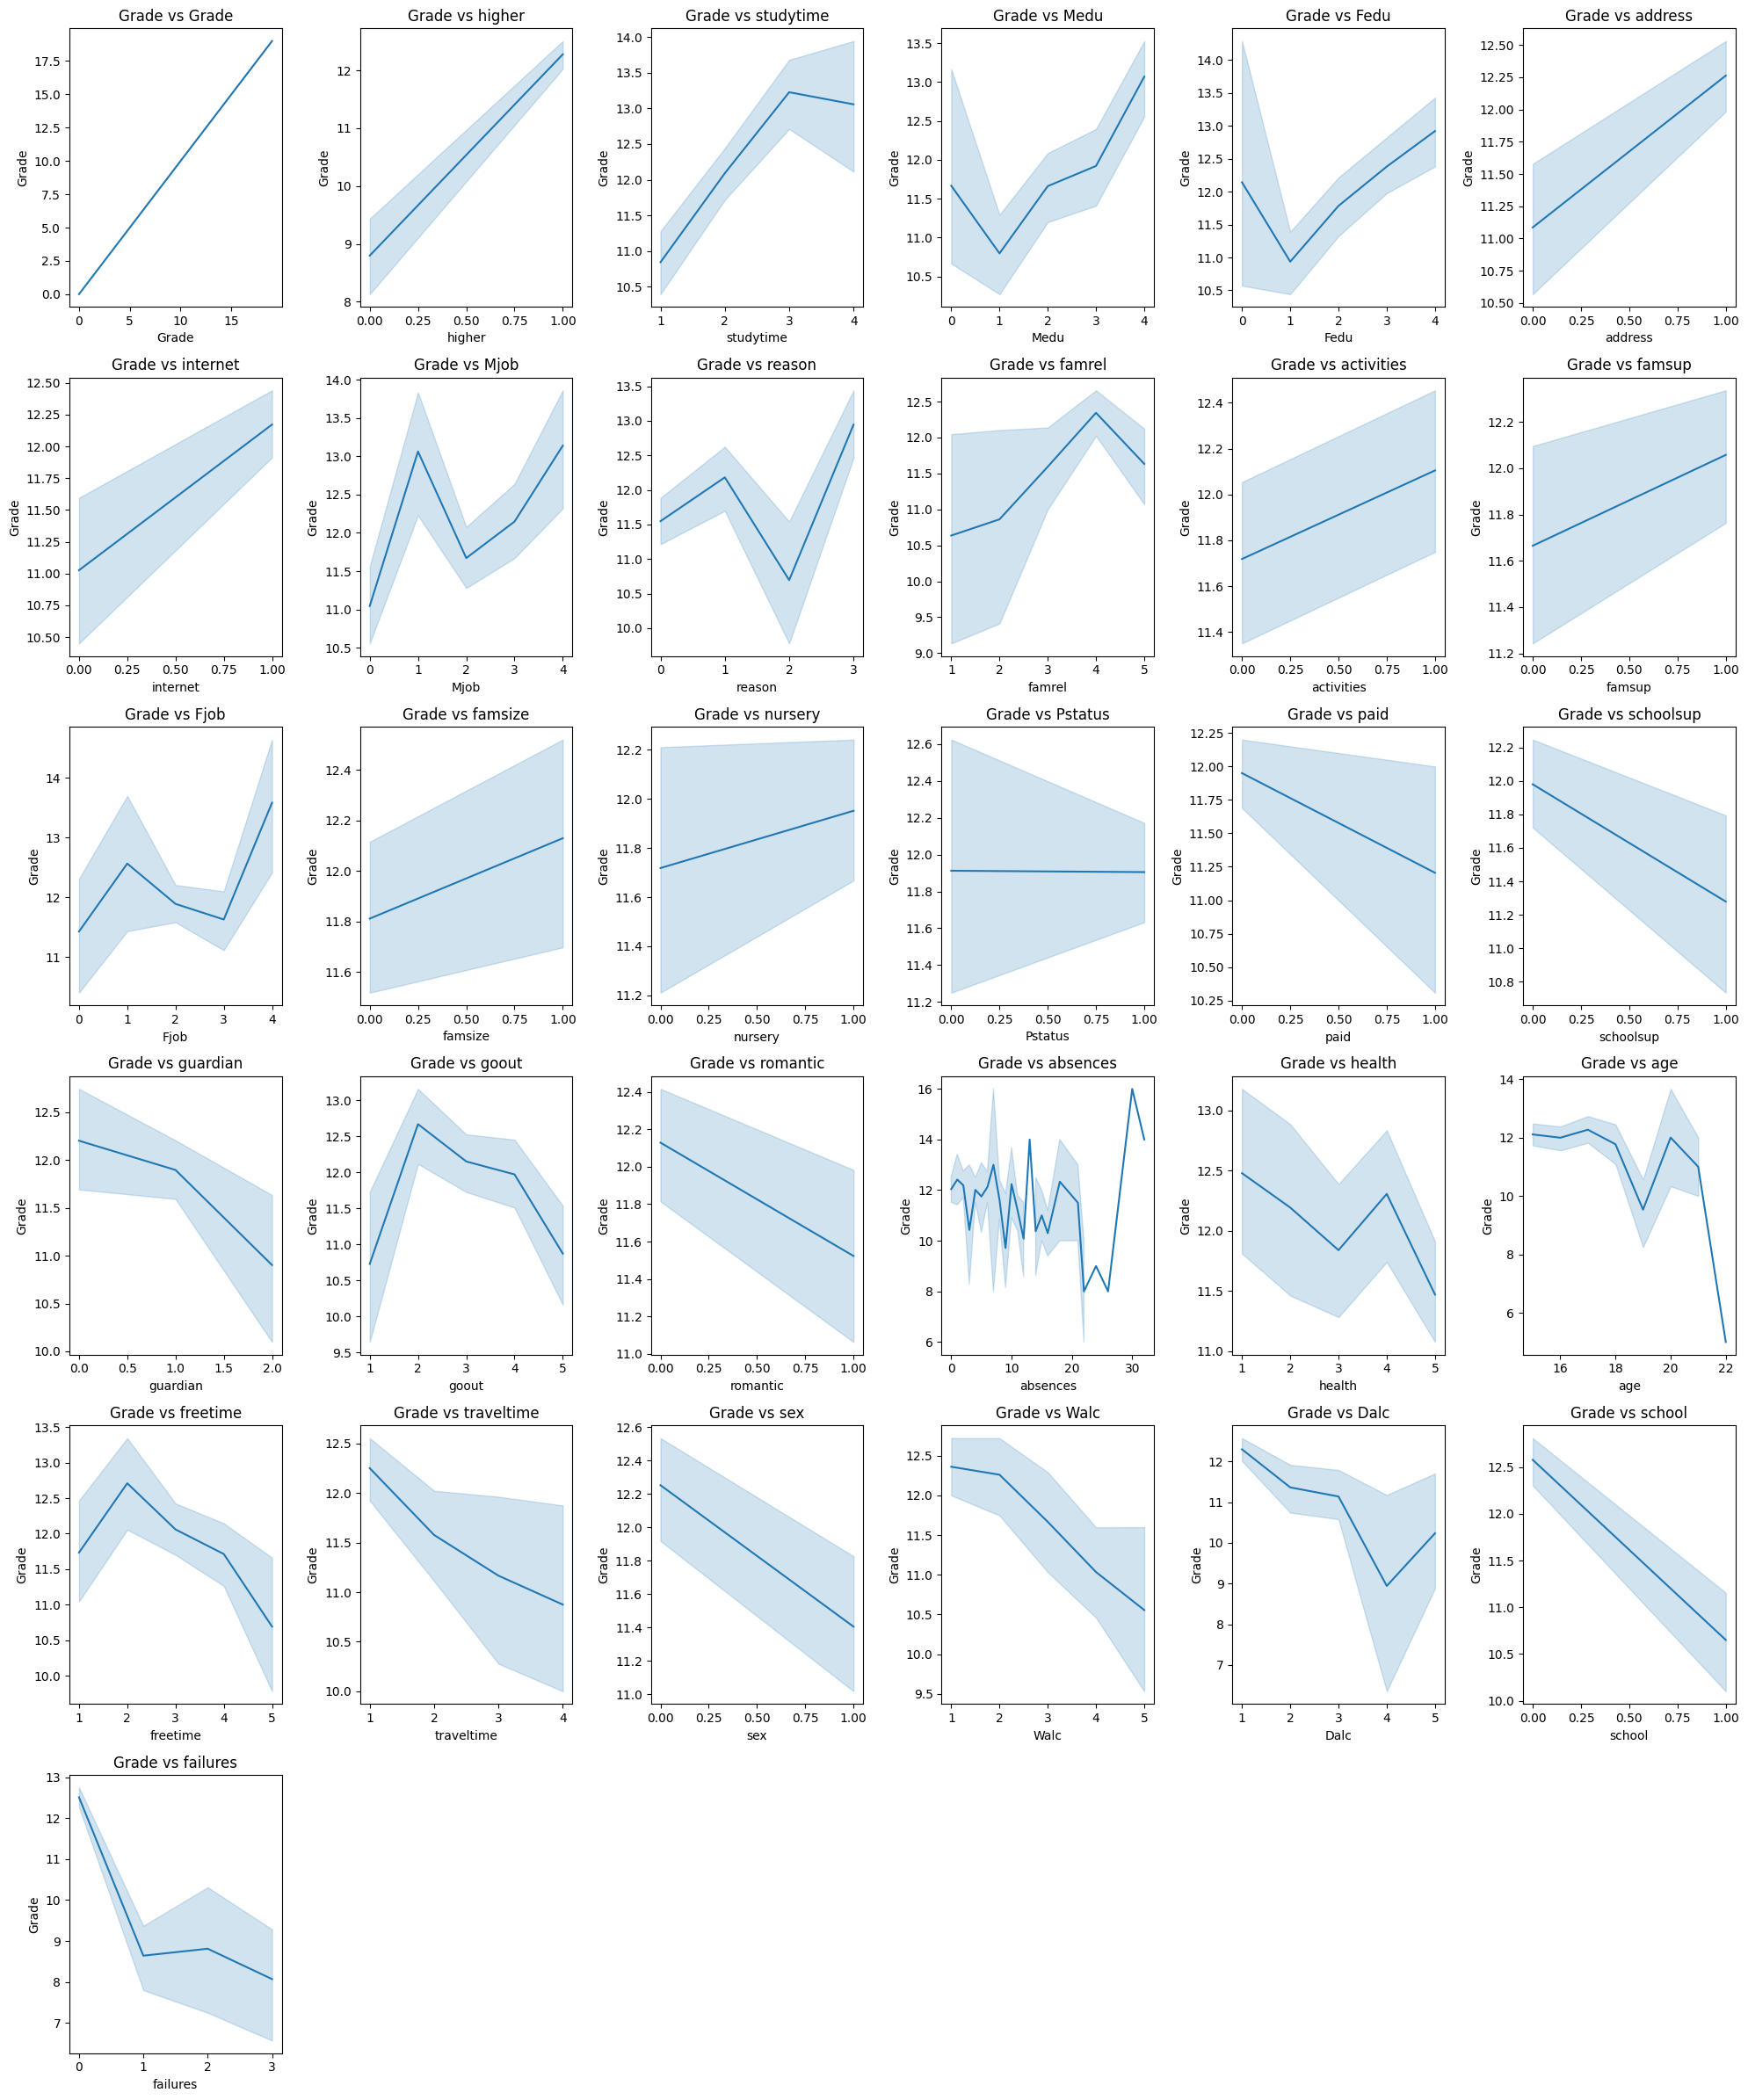

In [42]:
df = pd.DataFrame(orignal_data.corr()["Grade"].dropna().sort_values(ascending=False).items(), columns=["Feature", "Correlation"])

# Number of features
num_features = len(df["Feature"])
columns = 6  # Number of columns in the grid
rows = math.ceil(num_features / columns)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, columns, figsize=(20, rows * 4))  # Adjust figure size
axes = axes.flatten()  # Flatten axes array for easy iteration

for i, feature in enumerate(df["Feature"]):
    sns.lineplot(x=orignal_data[feature], y=orignal_data["Grade"], ax=axes[i])
    axes[i].set_title(f'Grade vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Grade")

# Hide any unused subplots (if features are less than grid size)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## 5. Analysing the importance of each column w.r.t Grade

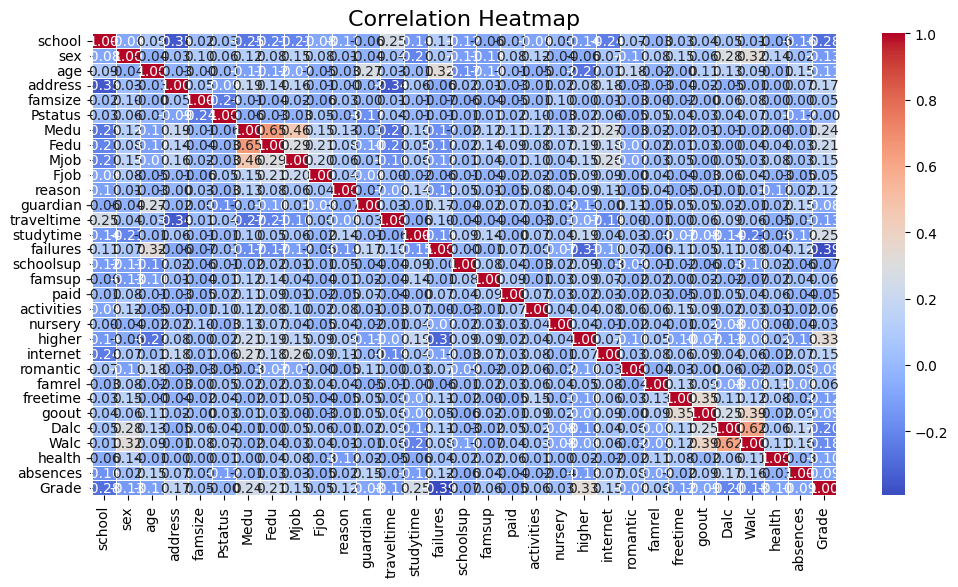

In [43]:
plt.figure(figsize=(12, 6))
sns.heatmap(orignal_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()
# NOTE: If the below metrics does not look appropriate then please try to run this cell individually.

## 6. Dropped some feature after analysing the above correlation:
1. Discarding some columns by analysing each column's relevance to our label (Grade).

In [44]:
# Drop unnecessary columns which lies between 0.063361 to -0.098851
"""
famrel        0.063361
activities    0.059791
famsup        0.059206
Fjob          0.052953
famsize       0.045016
nursery       0.028752
Pstatus      -0.000754
paid         -0.054898
schoolsup    -0.066405
guardian     -0.079609
goout        -0.087641
romantic     -0.090583
absences     -0.091379
health       -0.098851

"""
orignal_data.drop([ 'famrel', 'activities', 'famsup', 'Fjob', 'famsize', 'nursery', 'Pstatus', 'paid',
                'schoolsup', 'guardian', 'goout', 'romantic', 'absences', 'health'], axis=1,inplace=True)


## 7. from scikit learn split the data into train & test sets (split) 20%-80%

In [45]:
train_set, test_set = train_test_split(orignal_data, test_size=0.2, random_state=42)
print("train set is: ",len(train_set))
print("test set is: ",len(test_set))

train set is:  519
test set is:  130


## 8. Extracting label from training dataset

In [46]:
orignal_data = train_set.drop("Grade", axis=1)
orignal_data_label = train_set["Grade"].copy()
orignal_data = train_set.copy()

In [47]:
print("Training set rows and columns: ",orignal_data.shape)
print("Training label rows and columns:",orignal_data_label.shape)

Training set rows and columns:  (519, 17)
Training label rows and columns: (519,)


---

# 2. **Model Training**

Here, you need to:

1.	select and compare at least three machine learning models (seen/discussed during the lectures) appropriate for your modelling;
2.	if there are hyperparameters in a selected algorithm, define a hyperparameter search protocol (you can define your own), and tune them.


## Selecting the models and compare them on the basis of RMSE values (Error)
a. Linear regression

b. Logistic regression

c. Decision Tree

d. Random Forest

In [48]:
# Creating a Pipeline for setting up the standard scaler:
my_pipeline = Pipeline([('std_scaler', StandardScaler())])
new_orignal_data = my_pipeline.fit_transform(orignal_data)

# (a). Linear Regression

In [49]:
model= LinearRegression()
model.fit(new_orignal_data, orignal_data_label)
some_data= orignal_data.iloc[:10]
some_label= orignal_data_label.iloc[:10]
prepared_data= my_pipeline.transform(some_data)
predictions = model.predict(prepared_data) # Get predictions
rounded_predictions = np.round(predictions, 2)  # Round to 2 decimal places
print("These are the predicted values:-",(rounded_predictions))
print("These are the acual values:-",list(some_label))
# Convert predictions to class labels if necessary (for classification models)
if predictions.ndim > 1:  # If predictions are probability distributions
    predictions = predictions.argmax(axis=1)  # Convert probabilities to class labels
elif isinstance(predictions[0], float):  # If predictions are continuous values
    predictions = np.round(predictions).astype(int)  # Round and convert to integers

# Use `some_label` instead of `some_data`
accuracy = accuracy_score(some_label, predictions)
print("Accuracy:", accuracy * 100)

These are the predicted values:- [18. 12. 12. 13. 10. 11.  9. 10. -0. 12.]
These are the acual values:- [18, 12, 12, 13, 10, 11, 9, 10, 0, 12]
Accuracy: 100.0


## Root mean square for Linear Regression model

In [50]:
data_prediction= model.predict(new_orignal_data)
mse= mean_squared_error(orignal_data_label, data_prediction)
rmse=np.sqrt(mse)
print("Root Mean Square: ",rmse)

Root Mean Square:  4.032062310817137e-15


## Confusion metrics for Linear Regression Model

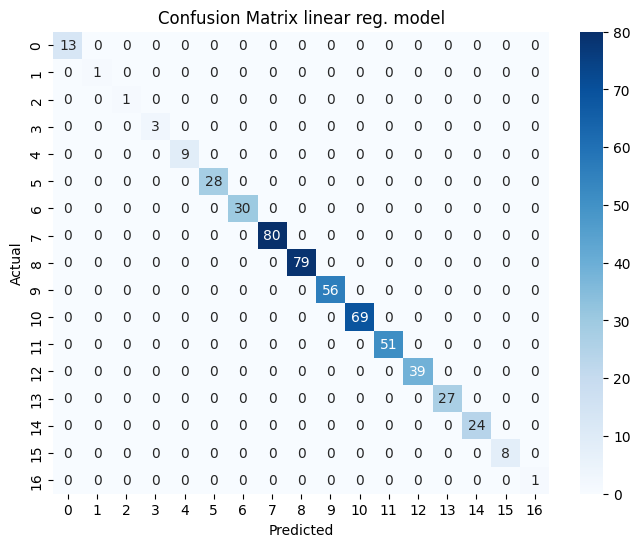

In [51]:
final_predictions = np.round(data_prediction)  # For binary classification

if final_predictions.ndim > 1:  # If predictions are probabilities:
    final_predictions = np.argmax(final_predictions, axis=1)

# Compute confusion matrix:
conf_matrix = confusion_matrix(orignal_data_label, final_predictions)

# Visualize:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix linear reg. model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# (b). Logistic Regresion

In [52]:

# Define Logistic Regression model with hyperparameters:
model = LogisticRegression(
    solver='lbfgs',         # Optimization algorithm
    max_iter=1000,          # Increased iterations to ensure convergence
    C=1.0,                  # Regularization strength
    random_state=42         # Ensures reproducibility
)

# Train the model with correct data (features: new_orignal_data, labels: orignal_data_label)
model.fit(new_orignal_data, orignal_data_label)

# Select some data for predictions:
some_data = orignal_data.iloc[:10]
some_label = orignal_data_label.iloc[:10]

# Preprocess the selected data:
prepared_data = my_pipeline.transform(some_data)

# Get predictions:
predictions = model.predict(prepared_data)

# Round predictions to 2 decimal places:
rounded_predictions = np.round(predictions, 2)

# Print rounded predictions:
print("These are the predicted values:", (rounded_predictions))
print("These are the acual values:-",list(some_label))
# Compute metrics on the full dataset:
final_predictions = model.predict(new_orignal_data)  # Predict for the full dataset

# Compute metrics:
accuracy = accuracy_score(orignal_data_label, final_predictions)
precision = precision_score(orignal_data_label, final_predictions, average='weighted')
recall = recall_score(orignal_data_label, final_predictions, average='weighted')
f1 = f1_score(orignal_data_label, final_predictions, average='weighted')

# visualise results:
print("\nTest Set Performance:")
print("Accuracy:  {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall:    {:.2f}%".format(recall * 100))
print("F1 Score:  {:.2f}%".format(f1 * 100))



These are the predicted values: [17 12 12 12 11 10 10 10  0 13]
These are the acual values:- [18, 12, 12, 13, 10, 11, 9, 10, 0, 12]

Test Set Performance:
Accuracy:  60.31%
Precision: 60.81%
Recall:    60.31%
F1 Score:  58.90%


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Root mean square for Logistic Regression model

In [53]:
data_prediction= model.predict(new_orignal_data)
mse= mean_squared_error(orignal_data_label, data_prediction)
rmse=np.sqrt(mse)
print("Root Mean Square: ",rmse)

Root Mean Square:  0.8931337309001807


## Applying Confusion metrics in logistic regression model:

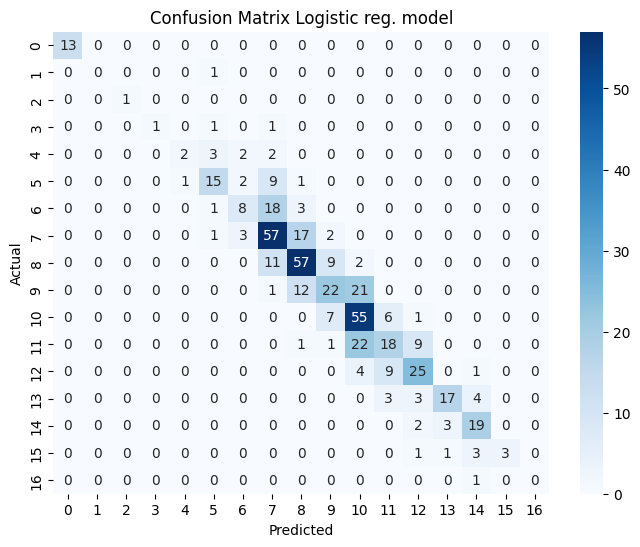

In [54]:
final_predictions = np.round(data_prediction)  # For binary classification:

if final_predictions.ndim > 1:  # If predictions are probabilities:
    final_predictions = np.argmax(final_predictions, axis=1)

# Compute confusion matrix:
conf_matrix = confusion_matrix(orignal_data_label, final_predictions)

# Visualize:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic reg. model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 1. Applying Cross Validation into logistic regression model and then finding the updated RMSE

In [55]:
# Creating the function
def print_scores(X, y):  # Pass data as parameters
    # Use StratifiedKFold to maintain class balance in each fold
    cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # Reduce n_splits if needed

    # Perform cross-validation (Logistic Regression expects classification, so MSE is not the best metric)
    scores = cross_val_score(LogisticRegression(), X, y, scoring="accuracy", cv=cv_strategy)  # Change metric if needed

    print("Scores:", scores)
    print("Mean Accuracy:", scores.mean())
    print("Standard Deviation:", scores.std())

# Assuming new_original_data and original_data_label are defined
print_scores(new_orignal_data, orignal_data_label)

# Make predictions
data_prediction = model.predict(new_orignal_data)
data_prediction = model.predict(new_orignal_data)

# Compute RMSE (Note: RMSE is unusual for classification problems)
mse = mean_squared_error(orignal_data_label, data_prediction)
rmse = np.sqrt(mse)

print("\nUpdated Root Mean Square Error:", rmse)
# Convert predictions to class labels if necessary (for classification models)
if predictions.ndim > 1:  # If predictions are probability distributions
    predictions = predictions.argmax(axis=1)  # Convert probabilities to class labels
elif isinstance(predictions[0], float):  # If predictions are continuous values
    predictions = np.round(predictions).astype(int)  # Round and convert to integers

# Use `some_label` instead of `some_data`
accuracy = accuracy_score(some_label, predictions)

print("Current Accuracy:", accuracy * 100)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Scores: [0.44230769 0.5        0.38461538 0.53846154 0.38461538 0.38461538
 0.44230769 0.40384615 0.44230769 0.33333333]
Mean Accuracy: 0.4256410256410256
Standard Deviation: 0.057563959796522166

Updated Root Mean Square Error: 0.8931337309001807
Current Accuracy: 40.0


## Applying Confusion matrix in Logistic reg. model after cross validation method:

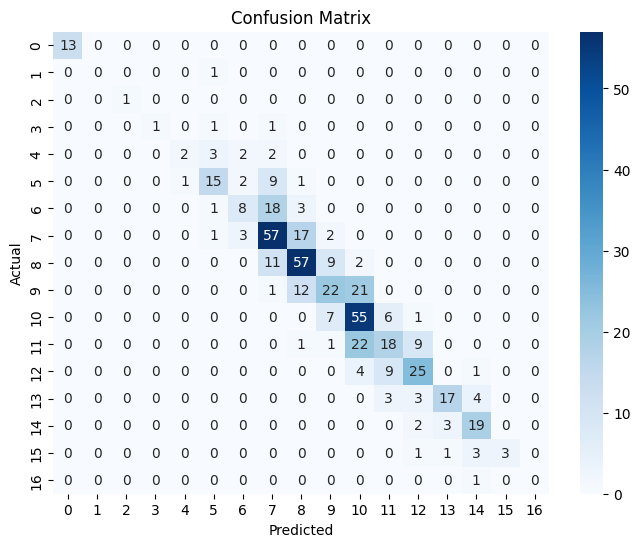

In [56]:
final_predictions = np.round(data_prediction)  # For binary classification


if final_predictions.ndim > 1:  # If predictions are probabilities
    final_predictions = np.argmax(final_predictions, axis=1)

# Compute confusion matrix:
conf_matrix = confusion_matrix(orignal_data_label, final_predictions)

# Visualize:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# (c). Decision Tree Regressor

In [57]:
# Define model with hyperparameters
model = DecisionTreeRegressor(
    criterion='squared_error',       # Correct criterion for MSE in newer scikit-learn versions
    max_depth=10,                    # Maximum depth of the tree
    min_samples_split=2,             # Minimum samples required to split an internal node
    min_samples_leaf=1,              # Minimum samples required to be at a leaf node
    max_features=None,               # Number of features to consider when splitting
    random_state=42                  # Set a random seed for reproducibility
)

# Train the model
model.fit(new_orignal_data, orignal_data_label)

# Select some data for predictions
some_data = orignal_data.iloc[:10]
some_label = orignal_data_label.iloc[:10]

# Preprocess data using a pipeline (if applicable)
prepared_data = my_pipeline.transform(some_data)

# Get predictions
predictions = model.predict(prepared_data)

# Round predictions to 2 decimal places
rounded_predictions = np.round(predictions, 2)

# Print rounded predictions
print("These are the predicted values:-", (rounded_predictions))
print("These are the acual values:-",list(some_label))


These are the predicted values:- [18. 12. 12. 13. 10. 11.  9. 10.  0. 12.]
These are the acual values:- [18, 12, 12, 13, 10, 11, 9, 10, 0, 12]


## RMSE value for Decision Tree model.

In [58]:
data_prediction= model.predict(new_orignal_data)
mse= mean_squared_error(orignal_data_label, data_prediction)
rmse=np.sqrt(mse)
print("Root Mean Square: ",rmse)

# Convert predictions to class labels if necessary (for classification models)
if predictions.ndim > 1:  # If predictions are probability distributions
    predictions = predictions.argmax(axis=1)  # Convert probabilities to class labels
elif isinstance(predictions[0], float):  # If predictions are continuous values
    predictions = np.round(predictions).astype(int)  # Round and convert to integers

# Use `some_label` instead of `some_data`
accuracy = accuracy_score(some_label, predictions)

print("Accuracy:", accuracy * 100)

Root Mean Square:  0.0
Accuracy: 100.0


## Applying Confusion metrics in Decision tree model:

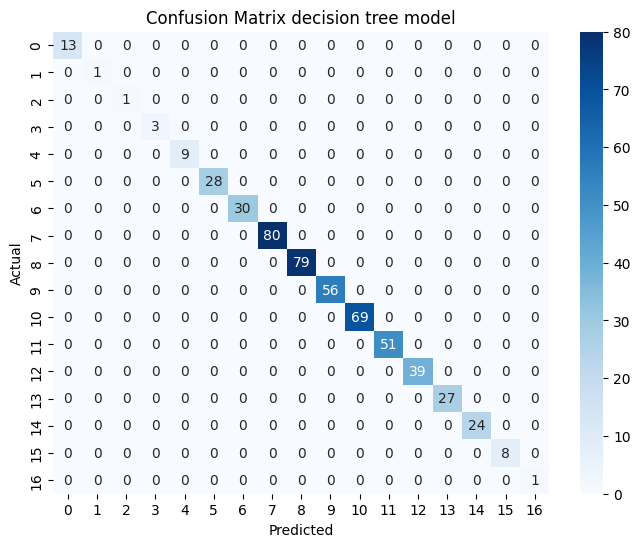

In [59]:
final_predictions = np.round(data_prediction)  # For binary classification

if final_predictions.ndim > 1:  # If predictions are probabilities
    final_predictions = np.argmax(final_predictions, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(orignal_data_label, final_predictions)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix decision tree model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# (d). Random Forest Regressor

In [60]:
# Define model with hyperparameters
model = RandomForestRegressor(
    n_estimators=100,              # Number of trees in the forest
    max_depth=10,                  # Maximum depth of each tree
    min_samples_split=2,           # Minimum number of samples required to split an internal node
    min_samples_leaf=1,            # Minimum number of samples required to be at a leaf node
    max_features='sqrt',           # Use square root of total features to consider when splitting (common default)
    bootstrap=True,                # Use bootstrap sampling (sampling with replacement)
    random_state=42                # Random seed for reproducibility
)

# Train the model :
model.fit(new_orignal_data, orignal_data_label)

# Select some data for predictions:
some_data = orignal_data.iloc[:10]
some_label = orignal_data_label.iloc[:10]

# Preprocess data using a pipeline:
prepared_data = my_pipeline.transform(some_data)

# Get predictions:
predictions = model.predict(prepared_data)

# Round predictions to 1 decimal place
rounded_predictions = np.round(predictions, 1)

# Print rounded predictions
print("These are the predicted values:-", (rounded_predictions))
print("These are the acual values:-",list(some_label))

These are the predicted values:- [16.9 11.9 12.3 12.8 10.  10.5  8.7  9.8  2.2 11.9]
These are the acual values:- [18, 12, 12, 13, 10, 11, 9, 10, 0, 12]


## RMSE value for Random forest model.

In [61]:
data_prediction= model.predict(new_orignal_data)
mse= mean_squared_error(orignal_data_label, data_prediction)
rmse=np.sqrt(mse)
print("Root Mean Square: ",rmse)

# Convert predictions to class labels if necessary (for classification models)
if predictions.ndim > 1:  # If predictions are probability distributions
    predictions = predictions.argmax(axis=1)  # Convert probabilities to class labels
elif isinstance(predictions[0], float):  # If predictions are continuous values
    predictions = np.round(predictions).astype(int)  # Round and convert to integers

# Use `some_label` instead of `some_data`
accuracy = accuracy_score(some_label, predictions)

print("Accuracy:", accuracy * 100)

Root Mean Square:  0.5032359689913017
Accuracy: 80.0


## Applying Confusion metrics in Random forest model:

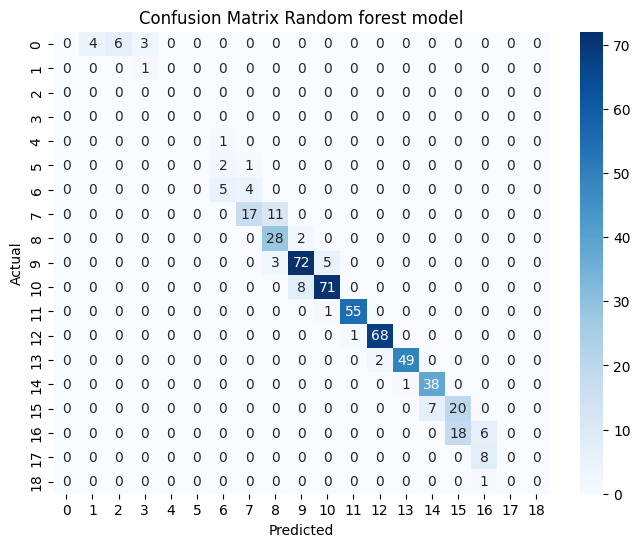

In [62]:
final_predictions = np.round(data_prediction)  # For binary classification

if final_predictions.ndim > 1:  # If predictions are probabilities
    final_predictions = np.argmax(final_predictions, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(orignal_data_label, final_predictions)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random forest model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

---

# 3. **Evaluate models**

Here, you need to:

1.	test the model (the best one you obtained from the above stage) on the testing dataset.


# We are choosing the Random Forest Regression model:

## 1. Extracting label from test dataset




In [63]:
X_test = test_set.drop("Grade", axis=1)
Y_test = test_set["Grade"].copy()
X_test = test_set.copy()

In [64]:
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Predicted labels:-",np.round(final_predictions,2))
print()
print("Acual labels:-",list(Y_test))

Predicted labels:- [15.34 12.06 16.13 10.63 11.01 15.63 16.19  8.33 10.47 11.13 15.27 11.02
 12.32 10.37 12.18 13.79 13.34  9.37 14.64 13.92 14.68 13.12 13.21 12.77
 15.05 12.75  8.55 12.14 10.24 14.85 14.75 11.99  9.09  8.32 15.75 15.3
 14.16 14.87 13.95 10.57 12.89 10.83 10.23 11.28 13.71 11.91 15.3  12.26
 14.28 11.89  9.42 11.3  13.05 10.41 11.21 16.26 10.2  11.2  10.33  9.61
  8.38 10.98 15.76 13.98 16.21 14.77 10.17  9.08  5.04  9.7  15.35 14.6
 12.29 14.65 13.14 11.95 13.06 14.88 13.17 13.04  9.9  11.65 15.66  9.25
 11.93 15.42 11.1  10.24 14.61 12.99 14.18  8.48 11.1  16.81  9.34 14.75
 14.6   9.84 12.39 10.53 11.6  11.   10.7   9.87 13.41 10.26 10.55 11.21
  9.6  13.08 13.2   9.53 11.01 10.38  8.79 10.54 10.99 15.68 13.39  9.03
 13.65  6.82 14.27 13.68 12.29  8.95 15.69 10.34 12.49 10.09]

Acual labels:- [19, 12, 18, 11, 11, 17, 18, 8, 10, 11, 18, 11, 12, 9, 12, 14, 13, 8, 15, 14, 15, 13, 13, 13, 16, 13, 8, 12, 10, 15, 16, 12, 9, 8, 18, 16, 14, 15, 14, 11, 13, 10, 8, 11, 14, 1

## Final RMSE value for Random Forest Model:

In [65]:
print("This is the final rmse value for test dataset: ",final_rmse)

This is the final rmse value for test dataset:  1.1640866037290452


## Confusion metrics for the final test results:

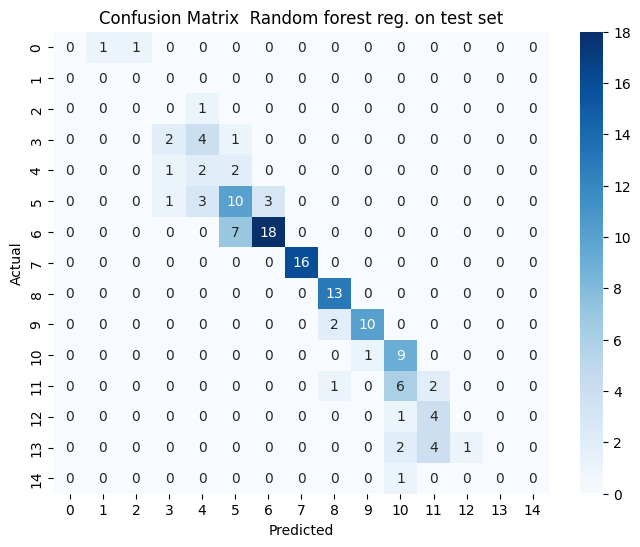

In [66]:
final_predictions = np.round(final_predictions)  # For binary classification


if final_predictions.ndim > 1:  # If predictions are probabilities
    final_predictions = np.argmax(final_predictions, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, final_predictions)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix  Random forest reg. on test set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculating the Test Set Performance of this model:

In [67]:
# Define RandomForestRegressor with hyperparameters
model = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=10,      # Maximum depth of each tree
    random_state=42    # Ensures reproducibility
)

# Train the model with correct data (training set)
model.fit(X_test, Y_test)

# Make predictions on the test set
final_predictions = model.predict(X_test)

# Since it's regression, round predictions to nearest integer (assuming classification task)
final_predictions = np.round(final_predictions).astype(int)

# Compute metrics (assuming Y_test contains class labels)
accuracy = accuracy_score(Y_test, final_predictions)
precision = precision_score(Y_test, final_predictions, average='weighted', zero_division=1)
recall = recall_score(Y_test, final_predictions, average='weighted', zero_division=1)
f1 = f1_score(Y_test, final_predictions, average='weighted', zero_division=1)

# Compute RMSE (useful for regression tasks)
rmse = np.sqrt(mean_squared_error(Y_test, final_predictions))

# Display results
print("Test Set Performance:")
print(f"Accuracy:  {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall:    {recall * 100:.2f}%")
print(f"F1 Score:  {f1 * 100:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Test Set Performance:
Accuracy:  98.46%
Precision: 100.00%
Recall:    98.46%
F1 Score:  98.46%
Root Mean Squared Error (RMSE): 0.12
